### 1.One dimensional hard spheres.

To sample one dimensional hard spheres we consider $n$ clothes-pins of width $2\sigma$ on a line of length $L$.


__1.Direct sampling of the positions of two pins__ 

We sample the position of two pins with uniform probability distribution between $\sigma$ and $L-\sigma$ and reject if they overlap.



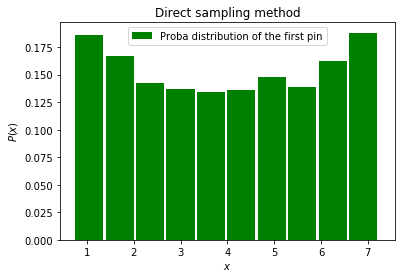

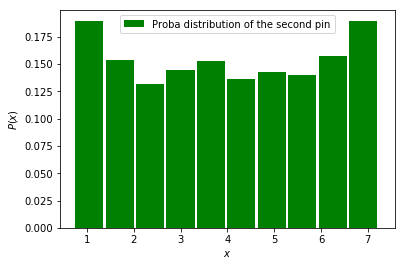

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import pylab
import scipy
from scipy import special


sigma = 0.75
trials=10000
L=8

xlist=[]
ylist=[]
for k in range(trials):
    x=np.random.uniform(sigma,L-sigma)
    y=np.random.uniform(sigma,L-sigma)
    while abs(x-y)<2*sigma:
        x=np.random.uniform(sigma,L-sigma)
        y=np.random.uniform(sigma,L-sigma)
    xlist.append(x)
    ylist.append(y)  

plt.hist(xlist,bins=10,normed=True,
         width=0.6,color='green',label="Proba distribution of the first pin")
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.title('Direct sampling method')
plt.legend()
plt.show()
plt.hist(ylist,bins=10,normed= True,color='green',  width=0.6,label="Proba distribution of the second pin")
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.legend()
plt.show()    

As you can see from the histogram above, despite of the fact that we were sampling points from the uniform distribution, the probability distribution of the particles is increasing near the borders and uniform far from them. 

To explain this consider the situation when the first particle is far from the boarders, then it is more probable that the second particle will overlap with the first one, since it can overlap from the right and from the left. In the case when the first particle is near the boarder, the second pin can overlap with the first one only from one side, meaning higher acceptance ratio and higher probability for particle to be near the boarders. 

__2. Wrong sampling procedure __

    
The direct sampling procedure becomes time consuming while generating a large number of particles. One could think of the other stratery to sample this distribution, instead of regenerating both points every time particles overlap, we could keep the first one and just regenerate the second point untill it will be on a distance greater than $2\sigma$ from the first one. 


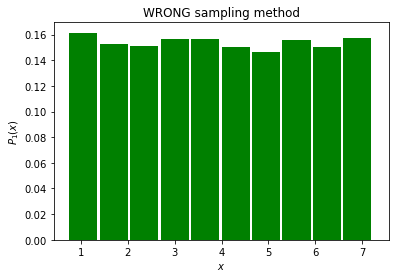

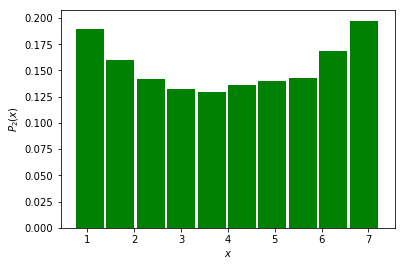

In [85]:
trials=10000
x_wrong=[]
y_wrong=[]
for i in range(trials):
    x=np.random.uniform(sigma,L-sigma)
    y=np.random.uniform(sigma,L-sigma)
    #print('gen',i,x,y,abs(x-y))
    while abs(x-y)<2*sigma:
        y=np.random.uniform(sigma,L-sigma)
      #  print('iter',i,x,y,abs(x-y))
    x_wrong.append(x)
    y_wrong.append(y)
   # print('apped',i,x,y)

plt.hist(x_wrong,normed=True,color='green',bins=10,width=0.6)
plt.xlabel('$x$')
plt.ylabel('$P_1(x)$')
plt.title('WRONG sampling method')
plt.show()
plt.hist(y_wrong,normed=True,color='green',bins=10,width=0.6)
plt.xlabel('$x$')
plt.ylabel('$P_2(x)$')
plt.show()


As we can see probability distribution of the first point is uniform, since we are keeping it's value once generated. But for the second point we still get the higher probability near the boundaries, because as before once we have generated the first pin, the available volume for the second one is not the same if the first pin is near the boundary or inside the line.  

### 3. Naive uniform procedure.

Let us use direct sampling procedure to generate $n$ pins. For $L=10$ and $\sigma=0.1$ we plot the number of points, which has been rejected by procedure before reaching correct configuration. As you can see, the number of rejected points increasing exponentially with the number of pins. This leads also to the dramatic increase of the time required to generate large number of pins. 

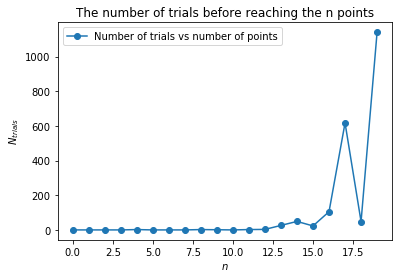

In [257]:
points=[]
def pins_gen(N,sigma,L):
    p=0
    k=1
    x=[np.random.uniform(sigma,L-sigma)]
    while k < N:
        x.append(np.random.uniform(sigma,L-sigma))
        for j in range(0,k-1):
            if abs(x[k]-x[j])<2*sigma:
                k=0
                x=[np.random.uniform(sigma,L-sigma)]
                p=p+1
                break
        k=k+1
    k=1
    points.append(x)
    return{'points':x,'count':p}
trials=[] 
n_points=20
for k in range(n_points):
    trials.append(pins_gen(k,0.1,10)['count'])        
plt.plot(range(n_points),trials, 'o-',label="Number of trials vs number of points")
plt.xlabel('$n$')
plt.ylabel('$N_{trials}$')
plt.title('The number of trials before reaching the n points')
plt.legend()
plt.show()

### 4. Clever way to sample n pins.

It is possible to generate a large number of pins without any rejection. For this we generate random numbers $x'_i$ betwen $0$ and $L-2n\sigma$. Then we sort them out and spread over the line using the formula $x_i=x'_i+(2i-1)\sigma$. 


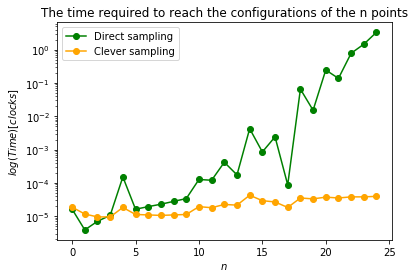

In [260]:
def pins_smart(n,sigma,L):
    x=np.random.uniform(0,L-2*n*sigma,n)
    x_sorted=sorted(x)
    points=[]
    for k in range(n):
        points.append(x_sorted[k]+(2*(k+1)-1)*sigma)
    return(points)
timest_naive=[]
timest_smart=[]    
elapsed=0
start=0 
n_points=25
for k in range(n_points):
    start = time.perf_counter()
    pins_gen(k,0.1,10)['count']
    timest_naive.append(time.perf_counter()-start)
    start = time.perf_counter()
    pins_smart(k,0.1,10)
    timest_smart.append(time.perf_counter()-start)
plt.semilogy(range(n_points),timest_naive ,'o-',color='green',label='Direct sampling')
plt.semilogy(range(n_points),timest_smart,'o-',color='orange',label='Clever sampling')
plt.xlabel('$n$')
plt.ylabel('$log(Time)[clocks]$')
plt.title('The time required to reach the configurations of the n points')
plt.legend()
plt.show()    
 

Here we plot the time required to generate a given number of pins. As can be seen from this plot, the rejection-free algorythm is much faster than the naive direct sampling in case of large $n$.

### 5. Clever sampling: histogram of the position of all particles. 

We generate $10$ pins on the line $L=21$ with $\sigma=0.75$. Let us repeat this procedure $100000$ times and plot the histogram of the position of all particles. As can be seen from the histogram there are some oscillations of the probability close to the boarders. At $x=2\sigma$ and $x=L-2\sigma$ it becomes really really small. Then far from the boarders probability becomes nearly uniform.    


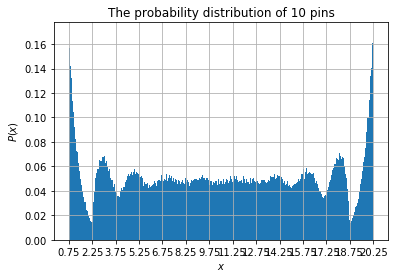

In [261]:
dist=[]
for i in range(100000):
    dist+=pins_smart(10,0.75,21)
fig = plt.figure()
plt.hist(dist,normed=True,bins=1000)
ax = fig.gca()
ax.set_xticks(np.arange(0.75, 21, 1.5))
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.title('The probability distribution of 10 pins')
plt.show()


### 6. This probability distribution can be obtained analytically. 

\begin{equation}
Z(n,L)=(L-2n\sigma)^n\,,
\end{equation}

\begin{equation}
p(x)=\frac 1 {Z(n,L)}\sum_i^{n-1}C^{n-1}_iZ(i,x-\sigma)Z(n-1-i,L-x-\sigma)\,.
\end{equation}


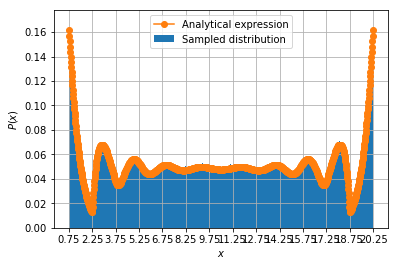

In [262]:
def z(n,L,sigma):
    if L-2*n*sigma>0: 
        return (L-2*n*sigma)**n
    else:
        return 0
def p(x,N,L,sigma):
    series=[]
    for i in range(N):
        series.append(scipy.special.binom(N-1,i)*z(i,x-sigma,sigma)*z(N-1-i,L-x-sigma,sigma))
    return (sum(series)/(z(N,L,sigma)))
def proba(n,L,sigma):
    prob=[]
    dist=[]
    for i in range(1,1000):
        prob.append(p(sigma+i*((L-2*sigma)/1000),n,L,sigma))
        dist.append(sigma+i*((L-2*sigma)/1000))
    return {'proba':prob,'length':dist}
fig = plt.figure()
plt.hist(dist,normed=True,bins=1000,label='Sampled distribution')
ax = fig.gca()
ax.set_xticks(np.arange(0.75, 21, 1.5))
plt.grid()
plt.plot(proba(10,21,0.75)['length'],proba(10,21,0.75)['proba'],'o-',label='Analytical expression')
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.legend()
plt.show()